# Predicting Telecom Customer Churn

#### Jørgen Lund and Akshay Sundar

# Introduction to Problem

As a telecom company, Telco is concerned with the number of paying customers who are leaving the service and terminating their contracts. As a mode to combat this churn, the company has decided to study the links between a customer's profile, their personal information, as well as their subscription information to determine whether they can predict whether they will terminate their contract or not.

This is the objective of the problem, to predict whether a customer will leave or not, based on a collection of characteristics, as described in the following sections.

**Approach:** Our approach involves three main components - 

1) Exploratory Data Analysis

2) Statistical Tests to check for Relationships

3) Generation of Classification Model

**Data Source:** The basis for this project is an IBM Sample Dataset that can be downloaded here: https://www.kaggle.com/blastchar/telco-customer-churn.  

## Data preprocessing and Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Telco_data.csv")

In [2]:
rows, cols = df.shape
print("The dataset has %s observations of %s variables." % (rows, cols))

The dataset has 7043 observations of 21 variables.


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Most of the features are self-explanatory. However, a few of them could use a short clarification: 
* Partner: whether or not the customer has a partner.
* Dependents: whether or not the customer has dependents.
* tenure: number of months the customer has stayed with the company.
* contract: the contract term of the customer.
* TotalCharges: the total amount charged to the customer.
* Churn: whether or not the customer has cancelled the subscription with the company. 

In [5]:
len(df.customerID.unique()) == df.shape[0]

True

The number of unique customer ID's in the dataset is equal to the number of rows. This means that we cannot analyse the changes in a customer's behavior over time, as this is a snapshot of the customer data at a given point. Hence we cannot utilize the customerID column, and can remove it.

In [6]:
df.drop("customerID", inplace=True, axis=1)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We expect monthly charges and total charges to be continuous variables. However, we see that TotalCharges is of type 'object'.

In [8]:
sorted(df.TotalCharges)[0:12]

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '100.2']

Some values are empty strings, which we can consider missing values. We will take a closer look at these customers to decide how to handle it.

In [9]:
df.loc[df["TotalCharges"] == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


All the customers with missing values in the TotalCharges column also has tenure = 0. The tenure describes the number of momnths the customer has stayed with the company. We can conclude that the missing values are due to the customers not having payed anything to the company yet, becasue they just started their subscription. We can therefore safely impute zeros for the missing values in the TotalCharges column and convert it from 'object' to 'float'.

In [10]:
df.TotalCharges.replace(" ", 0, inplace=True)
df.TotalCharges = df.TotalCharges.astype(float)

Next, we will look at the categorical variables in the dataset. Since many of the categorical variables takes yes/no values, it could be useful to split them in "binary varaibles" and "categorical variables". We begin by looking at the unique levels of these variables.

In [11]:
# Binary variables
binary_vars = []
for col in df:
    if len(df[col].unique()) == 2:
        binary_vars.append(col)
        print(col, ": ", df[col].unique())

gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
PaperlessBilling :  ['Yes' 'No']
Churn :  ['No' 'Yes']


In [12]:
# Categorical variables
cat_vars = []
for col in df:
    if len(df[col].unique()) > 2 and df[col].dtype==object:
        cat_vars.append(col)
        print(col, ": ", df[col].unique())

MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


* Because the binary variable PhoneService tells us whether or not the customer has phone service, the level "No phone service" in MultipleLines is redundant. 
* In the categorical variable InternetService, one level is "No". This makes one level reduntant in each of the six next variabels, because they alle include "No internet service", which is already accounted for. 

We can remove the mentioned redundant levels, which turns seven of the categorical variables into binary variables.

In [13]:
df.MultipleLines.replace("No phone service", "No", inplace=True)
df.OnlineSecurity.replace("No internet service", "No", inplace=True)
df.OnlineBackup.replace("No internet service", "No", inplace=True)
df.DeviceProtection.replace("No internet service", "No", inplace=True)
df.TechSupport.replace("No internet service", "No", inplace=True)
df.StreamingTV.replace("No internet service", "No", inplace=True)
df.StreamingMovies.replace("No internet service", "No", inplace=True)

In [14]:
# Update the list of binary variables
binary_vars = []
for col in df:
    if len(df[col].unique()) == 2:
        binary_vars.append(col)
        print(col, ": ", df[col].unique())

gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No' 'Yes']
OnlineSecurity :  ['No' 'Yes']
OnlineBackup :  ['Yes' 'No']
DeviceProtection :  ['No' 'Yes']
TechSupport :  ['No' 'Yes']
StreamingTV :  ['No' 'Yes']
StreamingMovies :  ['No' 'Yes']
PaperlessBilling :  ['Yes' 'No']
Churn :  ['No' 'Yes']


In [15]:
# Update the list of categorical variables
cat_vars = []
for col in df:
    if len(df[col].unique()) > 2 and df[col].dtype==object:
        cat_vars.append(col)
        print(col, ": ", df[col].unique())

InternetService :  ['DSL' 'Fiber optic' 'No']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


After these transformations, we are left with 14 binary variables, and three categorical variables with more than two levels. We encode the binary variables 0/1, where 'Yes' or 'Male' is 1 and 'No' or 'Female' is 0.

In [16]:
# Encoding binary variables 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[binary_vars] = df[binary_vars].apply(lambda col: le.fit_transform(col))

# Male = 1, Female = 0
# Yes = 1, No = 0

For the categorical variables with more than two levels, we create dummy columns, which means that we create one dummy variable column for each level of the feature.

In [17]:
dummies = pd.get_dummies(df[cat_vars]).astype(int)

In [18]:
df_encoded = pd.concat(objs=(df, dummies), axis=1)

The remaining columns of type 'object' is now redundant, and can be removed.

In [19]:
df_encoded.drop(df.select_dtypes(['object']), inplace=True, axis=1) # dropping old categorical columns

In [20]:
print(df_encoded.columns.values)

['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'PhoneService'
 'MultipleLines' 'OnlineSecurity' 'OnlineBackup' 'DeviceProtection'
 'TechSupport' 'StreamingTV' 'StreamingMovies' 'PaperlessBilling'
 'MonthlyCharges' 'TotalCharges' 'Churn' 'InternetService_DSL'
 'InternetService_Fiber optic' 'InternetService_No'
 'Contract_Month-to-month' 'Contract_One year' 'Contract_Two year'
 'PaymentMethod_Bank transfer (automatic)'
 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check'
 'PaymentMethod_Mailed check']


We now have one column for each level of the three categorical variables InternetService, Contract and PaymentMethod. For each of these variables, we will have to remove one column, because it will be exatly multicollinear to the rest of the columns referring to the same variable. As an example, the column Contract_Month-to-month will be an exact linear combination of the columns Contract_One year and Contract_Two year. We could have specified that we wanted to remove one column in the get_dummies() function used above, but we wanted to choose which levels to remove.

We choose to drop the following columns, one for each categorical variable:

In [21]:
df_encoded.drop(labels=["InternetService_No", "Contract_Month-to-month", "PaymentMethod_Bank transfer (automatic)"], axis=1, inplace=True)

In [22]:
df_encoded.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

We clean up the colum names for easier use later. We also place the "churn" column last in the dataframe, to separate it from the independent variables. Finally, we save the preprocessed dataset to file.

In [23]:
# Cleaning up column names
clean_cols = ["gender", "senior", "partner", "dependents", "tenure", "phone", "multiple_lines", "online_security", "online_backup",
              "device_protection", "tech_support", "streaming_tv", "streaming_movies", "paperless_billing", "monthly_charges",
              "total_charges", "churn", "internet_dsl", "internet_fiber", "contract_1_yr",
              "contract_2_yr", "payment_credit_card", "payment_electronic_check", "payment_mailed_check"]
df_encoded.columns = clean_cols

In [24]:
churn_col = df_encoded.churn
df_encoded.drop("churn", axis=1, inplace=True)
df_encoded["churn"] = churn_col

In [25]:
df_encoded.to_csv("telco_preprocessed.csv")

**Splitting the dataset in 80/20 train/test for later use in prediction**

In [26]:
# splitting the dataset in 80/20 train/test
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_encoded, test_size=0.2, random_state=42)

In [27]:
# saving train/test split
df_train.to_csv("telco_train.csv")
df_test.to_csv("telco_test.csv")

## Data Exploration

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv("telco_preprocessed.csv", index_col=0)

In [30]:
rows, cols = df.shape
print("After preprocessing, the dataset has %s observations of %s variables." % (rows, cols))

After preprocessing, the dataset has 7043 observations of 24 variables.


In [31]:
df.describe().iloc[:,0:12]
df.describe().iloc[:,12:]

,streaming_movies,paperless_billing,monthly_charges,total_charges,internet_dsl,internet_fiber,contract_1_yr,contract_2_yr,payment_credit_card,payment_electronic_check,payment_mailed_check,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.387903,0.592219,64.761692,2279.734304,0.343746,0.439585,0.209144,0.240664,0.216101,0.335794,0.228880,0.265370
std,0.487307,0.491457,30.090047,2266.794470,0.474991,0.496372,0.406726,0.427517,0.411613,0.472301,0.420141,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,70.350000,1394.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,89.850000,3786.600000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* No missing values for any columns (other than the ones we imputed in the preprocessing step)
* No sign of extreme or counterintuitive values (like negative charges, etc.).

In [32]:
churn_rate = np.mean(df.churn)*100
print("The overall churn rate is {:.2f}%".format(churn_rate))

The overall churn rate is 26.54%


In [33]:
# churn_plot = sns.barplot(x="churn", y="churn", data=df, 
#                          estimator=(lambda x: len(x)/len(df)*100),
#                          orient="h")
# churn_plot.set(xlabel="Percent of total observations", ylabel="", yticklabels=["No churn", "Churn"])
# plt.show()

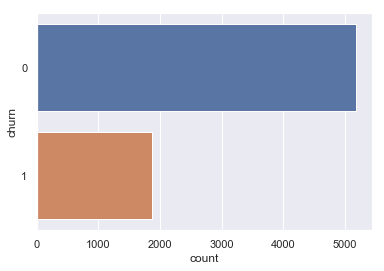

In [34]:
sns.set(style="darkgrid")
ax = sns.countplot(y="churn", data=df)

There is a clear class imbalance in the dependent variable churn, which is something we need to take into account when building a classification model.

### PCA
The dataset currently consist of 23 predictors and 1 dependent variable. We can perform a dimensionality reduction using PCA in an attempt to visualize the data.

In [35]:
# Scaling the predictors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

y = df.churn.values
X = df.drop(labels = "churn", axis=1).values

X = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ["PC1", "PC2"])

In [36]:
finalDf = pd.concat([principalDf, df.churn], axis=1)

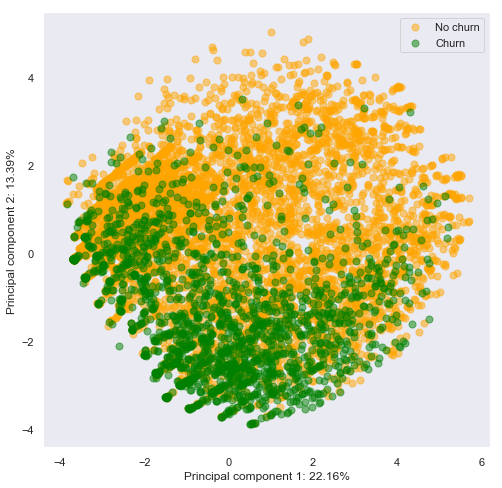

In [37]:
# Plotting the first two dimensions of the PCA
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

dims = pca.explained_variance_ratio_
ax.set_xlabel("Principal component 1: " + (round(dims[0]*100,2).astype(str) + "%"))
ax.set_ylabel("Principal component 2: " + (round(dims[1]*100,2).astype(str) + "%"))

target = [0, 1]
colors = ('orange', 'green')
for target, color in zip(target, colors):
    indicesToKeep = finalDf.churn == target
    ax.scatter(finalDf.loc[indicesToKeep, "PC1"], 
               finalDf.loc[indicesToKeep, "PC2"], 
               c = color, 
               s = 50,
               alpha = 0.5)

ax.legend(["No churn", "Churn"])
ax.grid()

The first two principal components explain around 35% of the variance in the dataset. Even though the two classes overlap heavily, we can clearly see that the majority of the "churn" observations are located in the lower part of the point cloud. Based on this, accurately predicting "no churn" for some observations will be possible, because parts of the observations are fairly well separated from the "churn" observations. Accurately classifying observations located in the area with heavy overlap will be harder.

### A closer look the customers grouped by churn/no churn

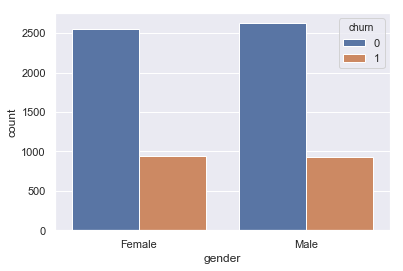

In [38]:
sns.set(style="darkgrid")
gender = sns.countplot(x="gender", hue="churn", data=df)
gender.set(xticklabels=["Female", "Male"])
plt.show()

In [39]:
binary_cols = []
for col in df.columns.values[1:16]:
    if (len(df[col].unique()) == 2) and (col != "churn"):
        binary_cols.append(col)
len(binary_cols)

12

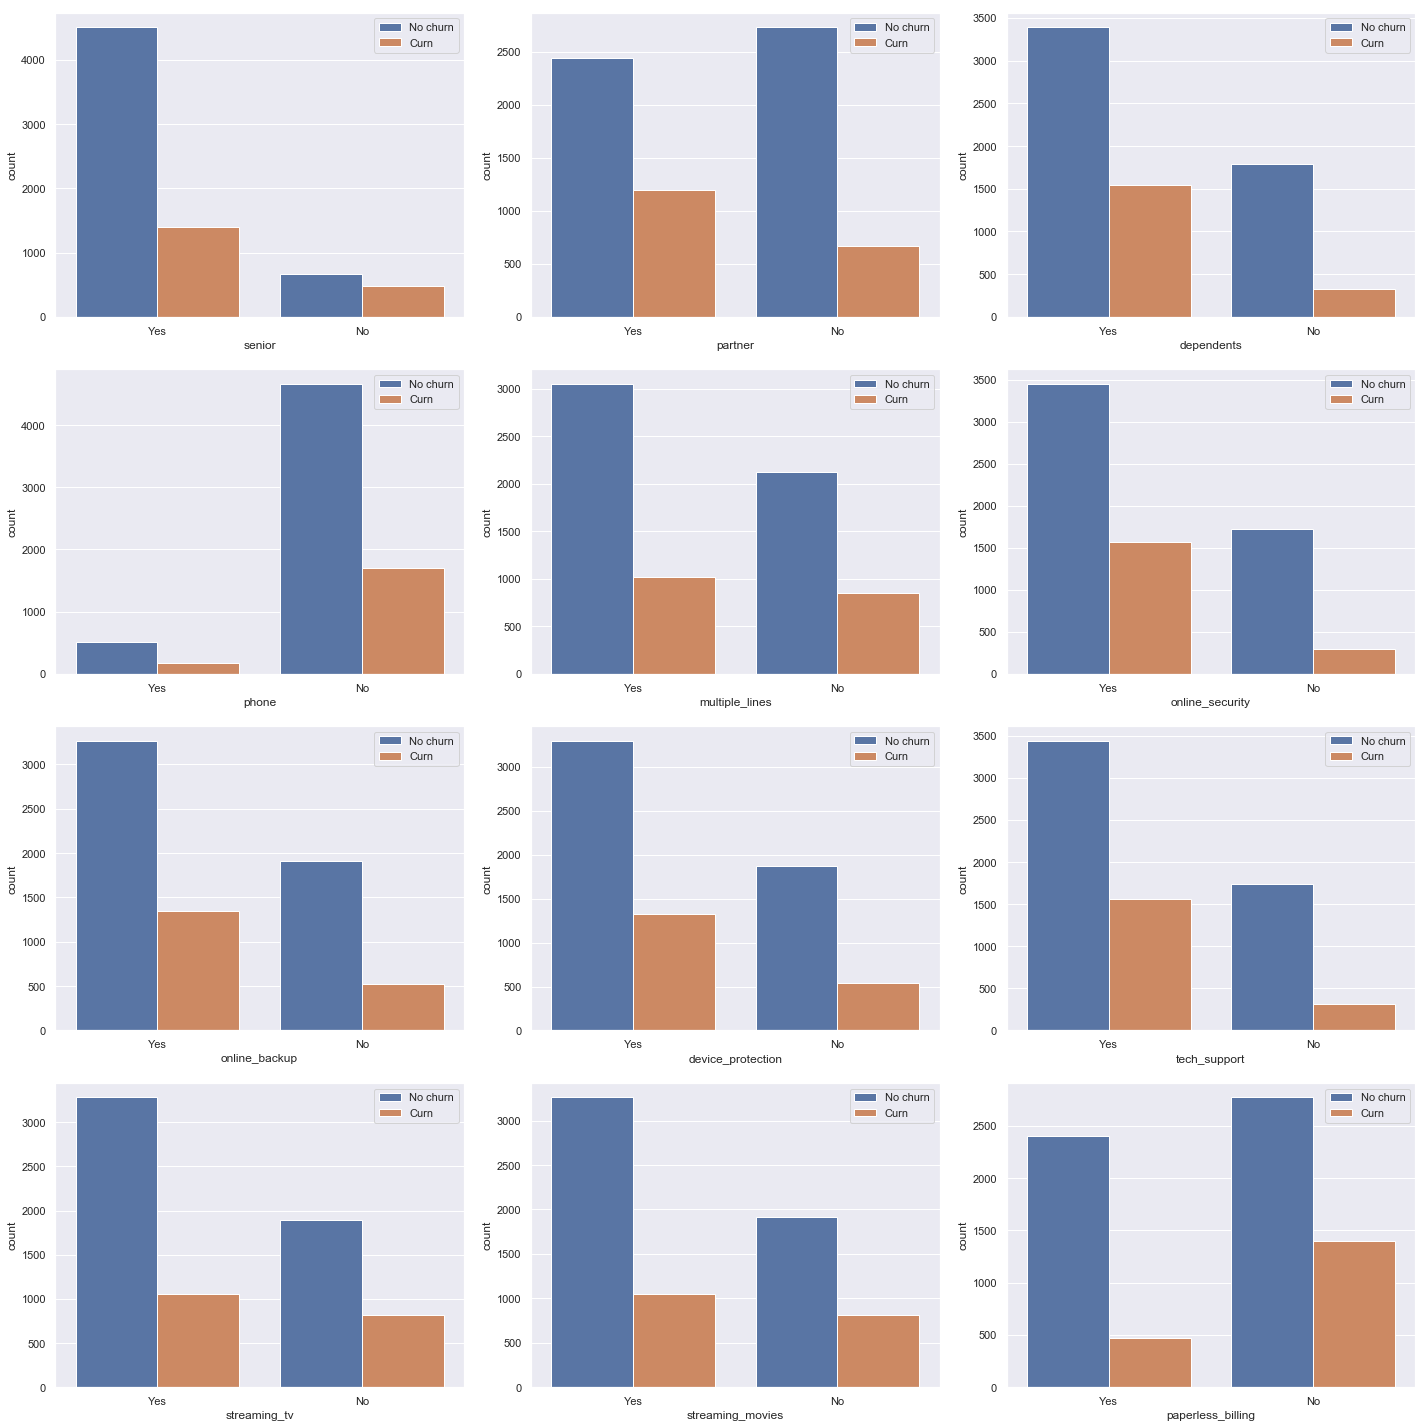

In [40]:
fig, axes = plt.subplots(4, 3, figsize=(20,20))
axes = axes.flatten()
for ax, col in zip(axes, binary_cols): 
    sns.countplot(x=col, data=df, ax=ax, hue="churn")
    ax.set_xticklabels(labels=["Yes", "No"])
    ax.legend(labels=["No churn", "Curn"])

plt.tight_layout()
plt.show()

### Correlation matrix and pair plots

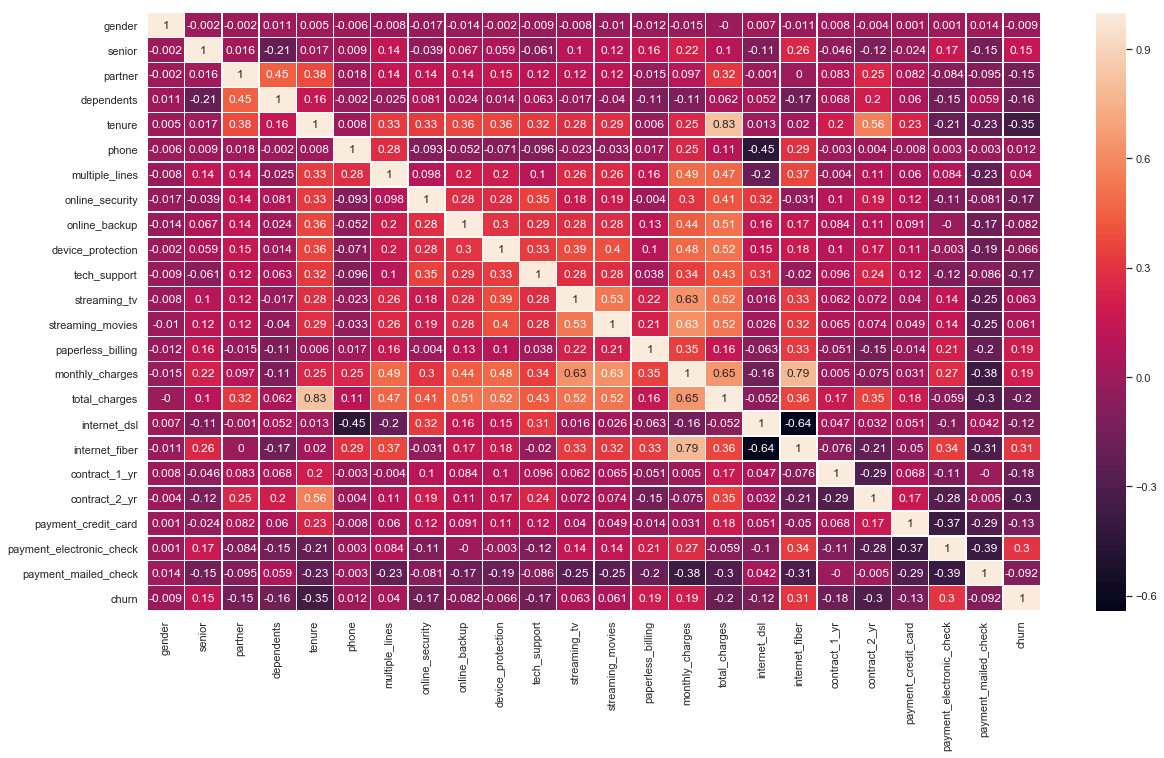

In [41]:
import seaborn as sns

corr = round(df.corr(), 3)

fig, ax = plt.subplots(figsize=(20,11))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
plt.show()

### Closer look at the quantitative variables

In [42]:
quant_vars = []
for col in df: 
    if df[col].nunique() > 2: 
        quant_vars.append(col)
        
quant_data = df[quant_vars + ["churn"]]

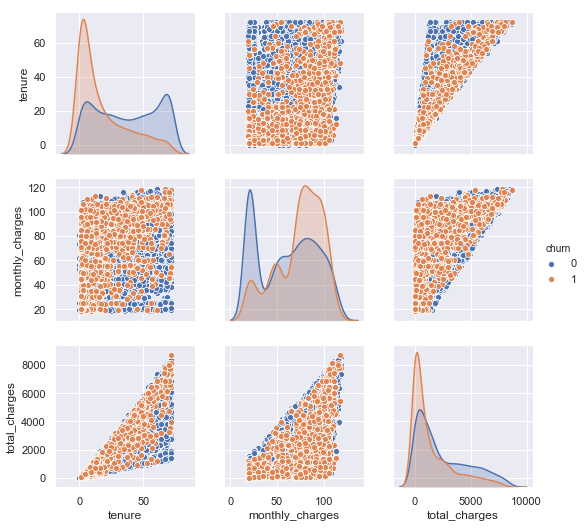

In [43]:
sns.pairplot(data=quant_data, vars=quant_vars, hue="churn")
plt.show()

# Hypothesis testing

In [44]:
import pandas as pd
import numpy as np

df = pd.read_csv("telco_preprocessed.csv", index_col=0)

In this part of the report, we want to look closer at which variables impact the variable churn, as well as test different hypotheses. As we have seen in the exploratory data analysis, the dataset consists of 3 quantitative and 21 categorical variables. We will use a two-sample proportion test for the categorical variables, and a two-sample t-test of means for the quantitative.

### Creating a function for performing proportion testing
We were not able to find a pre-made function for performing two-sample proportion tests. Below, we have implemented a function calculating the z-statistic and p-value according to the following formula.

<center><img src="formula.png"></center>

* p1 and p2 is the proportions in each sample
* n1 and n2 is the number of observations in each sample
* Y1 and Y2 is the number of "yes" in each sample, for the variable of which we are looking at proportions
* p is then the pooled proportion of the two samples

In [45]:
from scipy import stats

## Function for performing a two-sample, two-sided proportion test
# df1: sample 1
# df2: sample 2
# greater: if True, performs one-sided test ("greater than"). If False, two-sided (default)

def proportion_test(df1, df2, greater=False):
    n1 = len(df1)
    n2 = len(df2)
    n = n1 + n2
    
    p1 = np.mean(df1)
    p2 = np.mean(df2)
    
    Y1 = p1*n1
    Y2 = p2*n2
    
    p = (Y1+Y2)/(n1+n2)
        
    z_statistic = (p1-p2)/(np.sqrt(p*(1-p)*(1/n1+1/n2)))
    
    p_value = stats.norm.sf(abs(z_statistic))*2
    
    if greater==True:
        p_value = stats.norm.sf(z_statistic)

    print("z-statistic: {:.4f}, p-value: {:.4f}".format(z_statistic, p_value))
#     return z_statistic, p_value

### Testing categorical variables

If we want to explore which categorical variables affect churn, we can begin by looking at the proportion of churn in each category in our dataset.

In [46]:
# df: the dataframe for which we want to calculate proportions
# cols: the categorical variables we want to calculate churn proportions for
# retruns prop_df, a dataframe containing all the proportions with respect to the 

def calc_prop(df, cols):
    c0 = []
    c1 = []
    for col in cols: 
        cat0 = df[df[col] == 0]
        cat1 = df[df[col] == 1]

        c0.append(np.mean(cat0["churn"]))
        c1.append(np.mean(cat1["churn"]))
        
    d = {'No': c0, 'Yes': c1}
    prop_df = pd.DataFrame(data=d, index=cols)
    return prop_df

In [47]:
# saving all the column names to a list, and removing the non-categorical variables
# all other columns take values 0 or 1, so we can split the data into two groups for each column
cols1 = df.columns.values.tolist()
rem = ["tenure", "monthly_charges", "total_charges", "churn"]
for el in rem: 
    cols1.remove(el)

In [48]:
proportions = calc_prop(df, cols1)
proportions.sort_values(by="Yes", inplace=True)
proportions

,No,Yes
contract_2_yr,0.340501,0.028319
contract_1_yr,0.305745,0.112695
online_security,0.313296,0.146112
tech_support,0.311862,0.151663
payment_credit_card,0.296504,0.152431
dependents,0.312791,0.154502
internet_dsl,0.305063,0.189591
payment_mailed_check,0.287424,0.191067
partner,0.329580,0.196649
online_backup,0.291721,0.215315


*Note: for "gender", "Yes" is male and "No" is female.*

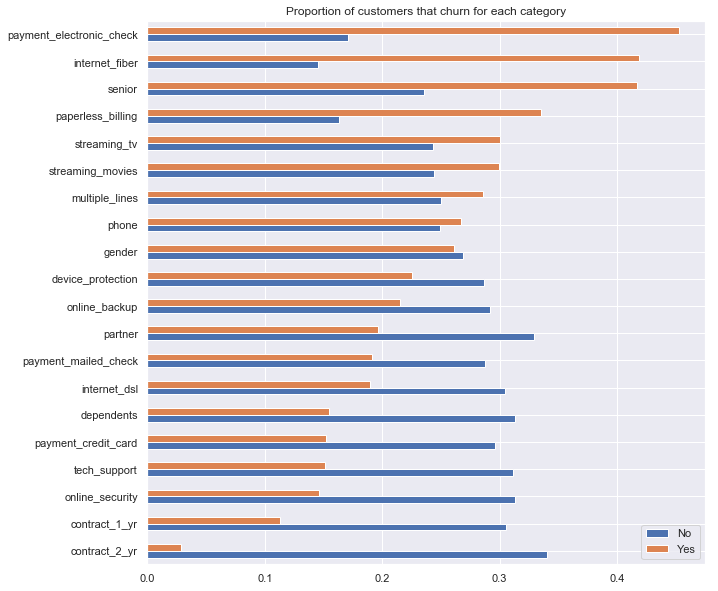

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ax = proportions.plot.barh(figsize=(10,10),
                           title="Proportion of customers that churn for each category")

We see that there are some clear differences for many of the categorical variables.
* At the very top of the plot, we find the customer category that has the *highest* proportion of churn. For customers that uses **electronic check** as their means of payment the churn rate is around 45%, compared to 17% for those who uses another payment method.
* In the other end of the plot, we find the customer category with the *lowest* proportion of churn. The proportion of customers who has a **long-term contract (2 years)** that churns is around 0.028, while the same proportion for those with other kinds of contracts are above 0.34. 
* In the middle somewhere, we see the categorical variable **gender**, where the blue bar ("No") represents females, and the orange bar ("Yes") represents males. We see that the proportions that churns for the two genders looks approximately equal.

This leads us to our first hypothesis.

**Hypothesis 1: There is a difference between the churn rate for males and females**  
Our null hypothesis is that the proportions are equal, while our alternative hypothesis is that they are different. We use the function proportion_test defined above, which returns the z-statistic and p-value of a two-sided, two-sample proportion test. We will use alpha = 0.05 as our significance level. 

In [50]:
# splitting the dataset into males and females
males = df[df["gender"] == 1]
females = df[df["gender"] == 0]
print(males.shape, females.shape)

(3555, 24) (3488, 24)


In [51]:
proportion_test(males.churn, females.churn, greater=False)

z-statistic: -0.7227, p-value: 0.4698


The p-value is 0.47, which means that we do not reject the null hypothesis. This means that we can safely say that there is no significant difference in the churn rate between men and women.

We can also define a test loop function and test whether or not the proportion of males and females that subscribe to different services are statistically different or not, i.e. if gender affects the probability that a customer is subscribing to a certain service. We will test this for a subset of the services that are included as categorical variables in our dataset.

In [52]:
# df1: sample 1
# df2: sample 2
# cols: varaibles for which we would like to perform a proportion test between the two samples
# onesided: True if one-sided test, False if two-sided test
def test_loop(df1, df2, cols, greater):
    for col in cols:
        proportion_test(df1[col], df2[col], greater=greater)

In [53]:
colz = ["streaming_movies", "tech_support", "online_backup", "device_protection"]
test_loop(males, females, colz, False)

z-statistic: -0.8801, p-value: 0.3788
z-statistic: -0.7731, p-value: 0.4395
z-statistic: -1.1559, p-value: 0.2477
z-statistic: -0.1766, p-value: 0.8598


Based on the resulting p-values, we see there is no statistically significant difference between men and women when it comes to subscribing to the services in the list above.

From the barchart of proportions discussed earlier, it looks like senior citizen are more likely to churn than non-senior citizen. In fact, the proportion of senior citizen that churn is approximately 0.42, while the proportion of non-senior citizen that churn is around 0.24. This leads us to testing our second hypothesis.

**Hypothesis 2: There is a difference between the churn rate of senior and non-senior customers**  
Again, our null hypothesis is that the two proportions are equal, and our alternative hypothesis is that they are different. We use the two-sided, two-sample proportions test again.

In [54]:
# split dataset into seniors and non-seniors 
seniors = df[df["senior"] == 1] 
non_seniors = df[df["senior"] == 0]
print(seniors.shape, non_seniors.shape)

(1142, 24) (5901, 24)


In [55]:
proportion_test(seniors.churn, non_seniors.churn, greater=False)

z-statistic: 12.6630, p-value: 0.0000


The z-statistic is large, and the p-value is very close to zero. This means that we reject our null hypothesis, and that the conclusion of our test is that the churn rate is different for senior and non-senior citizen. There could be many reasons for this, but an obvious one would be that senior customers are old and pass away more frequently than non-senior customers, which naturally leads to ending their telecom subscription.  

When testing males against females, we also tested whether or not there is a difference in their tendency to subscribe to certain services. Below, we perform the same tests for senior against non-senior citizen.

In [56]:
colz = ["streaming_movies", "tech_support", "online_backup", "device_protection"]
test_loop(seniors, non_seniors, colz, greater=False)

z-statistic: 10.0855, p-value: 0.0000
z-statistic: -5.0878, p-value: 0.0000
z-statistic: 5.5869, p-value: 0.0000
z-statistic: 4.9874, p-value: 0.0000


The results are somewhat surprising. We see that all the p-values are very close to zero, which means that there is a significant difference in the proportion of senior customers who subscribes to the services, and the proportion of non-senior customers who does the same. If we look at the z-statistics, we see that senior customers more often subscribe to movies streaming, online backup and device protection than non-senior customers.  

One explanation for this could be that senior citizen has more of their subscriptions with the same company, while younger customers tend to have subscriptions with several companies, like Netflix for streaming movies. It is also a possible explanation that seniors more often opt for add-on services that are not essential, like online backup and device protection, while younger customers are more price-sensitive and choose only the most essential services.  

The most surprising result, however, is the fact that senior customers are *less* likely to subscribe to tech support than non-senior citizen. For this, we have no good explanation.

**Hypothesis 3: Families are more loyal customers (i.e. churn less), and they are more likely to subscribe to additional services**  
To test this hypothesis, we will combine the categorical variables "partner" and "dependents" to a subset of the data which we can think of as "family". 

We first test whether or not families are more loyal customers than non-families. For this test, our null hypothesis is no difference in proportions that churn, and our alternative hypothesis is that the proportion of churn is *greater* for *non-families* than for families.

In [57]:
# splitting the dataset into families and non-families
families = df[(df["partner"]==1) & (df["dependents"]==1)]
non_families = df[(df["partner"]==0) | (df["dependents"]==0)]
print(families.shape, non_families.shape)

(1749, 24) (5294, 24)


In [58]:
proportion_test(non_families.churn, families.churn, greater=True)

z-statistic: 13.4381, p-value: 0.0000


The z-statistic is large and the p-value is very close to zero. This means that we clearly reject the null hypothesis of equal proportions and conclude that the non-families are more likely to churn. In other words, we establish that families are more loyal customers than non-families, in that they are less likely to churn.  

In [59]:
colz = ["streaming_movies", "tech_support", "online_backup", "device_protection"]
test_loop(families, non_families, colz, greater=False)

z-statistic: -0.7042, p-value: 0.4813
z-statistic: 6.2231, p-value: 0.0000
z-statistic: 3.7020, p-value: 0.0002
z-statistic: 3.9216, p-value: 0.0001


We see that for movies streaming, we do not have a significant difference between the proportions of families and non-families that subscribe, since the z-statistic is low and the p-value is 0.48. For the other variables however, all have high z-scores and p-values well below our threshold of 0.05. This means that there is a significant difference between the proportion of families who subscribe to tech support, online backup and device protection compared to other customers. One explanation for this is that families consists of more people than non-families, and hence they tend to subscribe to more services. We can also reason that families are more likely to subscribe to additional services like tech support because it allows the whole family to utilize it, and it therefore becomes relatively cheaper than for single customers.

### Testing quantitative variables

In addition to the categorical variables we have three quantitative variables in our dataset; monthly charges, total charges and tenure. We begin by taking a closer look at the correlation between them, and their correlation with the churn variable.

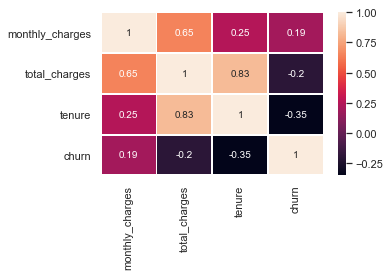

In [60]:
quant_vars = ["monthly_charges", "total_charges", "tenure", "churn"]

corr = df[quant_vars].corr()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,3))
sns.heatmap(corr, annot=True, linewidths=1, ax=ax)
plt.show()

Tenure and total_charges are naturally highly positively correlated, because total charges is the total amount the customer has paid to the company, and tenure is the number of months since he or she became a customer. Moreover, it's not surprising that monthly charges and total charges are also positively correlated.  

For the correlations with the churn variable, we see that tenure and total charges is slightly negatively correlated. The longer a customer has been associated with the company, and the higher the amount paid to the company, the less likely he or she is to churn. Monthly charges is slightly positively correlated with chrun, which means that a as the monthly charges becomes higher, the customer is slightly more likely to churn.  

That said, we have to be careful reading too much into the correlation coefficients between the respective variables. 

**Hypothesis 4: Senior customers have on average higher tenure and pay more than non-senior customers**  
Our three null hypotheses will be that there is no difference in the mean tenure, mean monthly charges and mean total charges between senior and non-senior customers. Our three alternative hypothesis will be that the mean values are *greater* for senior citizen than for other customers.  

To test these hypotheses we will use two-sample t-tests using the ttest_ind function from scipy.stats. 

In [61]:
from scipy.stats import ttest_ind
# df1: sample 1
# df2: sample 2
# cols: varaibles for which we would like to perform a mean test between the two samples
# greater: True if one-sided test ("greater than"), False if two-sided test
def t_test_loop(df1, df2, cols, greater=False):
    for col in cols: 
        res = ttest_ind(df1[col], df2[col])
        t = res.statistic
        p = res.pvalue
        
        
        if greater==True:
            n1 = df1.shape[0]
            n2 = df2.shape[0]
            df = min(n1-1, n2-1)
            p = stats.t.sf(t, df=df)
            
        print("{} | t-statistic: {:.3f} | p-value: {:.3f}".format(col, t, p))

In [62]:
quant_vars = ["monthly_charges", "total_charges", "tenure"]
t_test_loop(seniors, non_seniors, quant_vars, greater=True)

monthly_charges | t-statistic: 18.940 | p-value: 0.000
total_charges | t-statistic: 8.690 | p-value: 0.000
tenure | t-statistic: 1.390 | p-value: 0.082


We see that the t-statistics are large and the p-values approximately zero for monthly and total charges. This means that we reject the two null hypotheses that the mean charges for seniors are equal to the mean charges for other customers. In other words, we establish that senior customers pay more on average than the rest of the customer base. One possible explanation could be that the older customers are subscribing to older plans, and that telecom services have become cheaper over time. Earlier we also established that senior customers are more likely to subscribe to additional services like device protection and online backup.

Furthermore, we see that the t-statistic for the tenure variable is fairly low, and that the p-value for this test is 0.082. This is above our threshold of 0.05, which means that we do not reject the null hypothesis and conclude that there is no difference in the mean tenure between seniors and non-seniors. This is a bit surprising, as we would assume that many senior customers have been subscribing to the company for a long time. 

The fact that there is no difference average tenure highlights the role monthly charges plays when it comes to the difference in total charges between senior and non-senior customers. Since there is no significant difference in tenure, we can attribute the higher average total charges for senior customers to the fact that their monthly charges are higher. This is also reflected by the t-statistics; for monthly charges it is even higher than for total charges, which implies that the difference in total charges originates mainly from high monthly charges.

**Hypothesis 5: Families have have on average a higher tenure and pay more than other customers**  
Our final hypothesis test will be similar to the previous, but this time for families and non-families. Because families consits of more users than a couple or a single customer, we assume that the families spend more. Our three null hypotheses are that the mean values for charges and tenure are equal for families than non-families. Consequently, our three alternative hypotheses are that the mean values are greater for families than non-families.

In [63]:
from scipy.stats import ttest_ind
t_test_loop(families, non_families, quant_vars, greater=True)

monthly_charges | t-statistic: -6.094 | p-value: 1.000
total_charges | t-statistic: 9.704 | p-value: 0.000
tenure | t-statistic: 18.067 | p-value: 0.000


Quite surprisingly, the test for monthly charges is clearly non-significant, which means that we do not reject the null hypothesis that the means are equal. However, we see that the t-statistic is very low, which indicates that we framed our hypothesis counter-intuitive to what the data tells us.

In [64]:
print("Average monthly charges for families {:.2f} \nAverage monthly charges for non-families {:.2f}".
      format(np.mean(families.monthly_charges), np.mean(non_families.monthly_charges)))

Average monthly charges for families 60.97 
Average monthly charges for non-families 66.01


We see that the average monthly charges for non-families is actually considerable higher than for families. Our test would have been better framed the opposite way; mean monthly charges is greater for non-families than families.

In [65]:
t_test_loop(non_families, families, cols = ["monthly_charges"], greater=True)

monthly_charges | t-statistic: 6.094 | p-value: 0.000


This tells us the same - that the mean monthly charges of non-families is greater than the mean of families - but allows us to reject the null hypothesis and establish the difference in means.  

Furthermore, from the results of the two other tests we see that we can reject both null hypotheses. This means that we can establish that the mean values for total charges and tenure is significantly *greater for families* than for non-families. Considering the results we got when we tested seniors agianst non-seniors (where seniors had higher monthly and total charges, but the same tenure), this is a bit surprising. Here we see that non-families have the highest monthly charges, but because families typically have a longer tenure, their total charges is higher than for non-families. This showcases the dynamic between monthly charges, total charges and tenure - both tenure and monthly charges determines the total charges, but which variable that has the strongest effect on total charges differs between groups of customers.

# Summary of Approach Taken in Modelling

After the data exploration and preprocessing parts, we've looked into finding a model that predicts a customer's tendency to not renew a contract (churn) sufficiently well. For this we have tested multiple classification models (various methods along with tuning hyperparameters based on classification error), and finally chosen one based on a list of criteria. 

The training was conducted on 80% of the data, and testing was ultimately done to generate scores on the remaining 20% of the data.

# Import Libraries and Load Data

### Define Warning Blocker 

An initial blocker function was defined to block unnecessary warnings on the models. This is after the models were checked for any potential issues, to clean up the notebook.

In [66]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Import Libraries

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, log_loss, auc
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import RFE

In [68]:
from sklearn.linear_model import LogisticRegression 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

### Load Data

Two data sets were previously created with a split based on training and final testing. Both are loaded below.

In [69]:
df = pd.read_csv("telco_train.csv", index_col=0)
df_test = pd.read_csv("telco_test.csv", index_col=0)

## Feature Selection and Engineering

A few additional columns are added, that might assist the model in predicting the churn

In [70]:
df.head(10)

,gender,senior,partner,dependents,tenure,phone,multiple_lines,online_security,online_backup,device_protection,...,monthly_charges,total_charges,internet_dsl,internet_fiber,contract_1_yr,contract_2_yr,payment_credit_card,payment_electronic_check,payment_mailed_check,churn
2142,0,0,0,1,21,1,0,1,0,1,...,64.85,1336.80,1,0,1,0,0,0,1,0
1623,0,0,0,0,54,1,1,0,1,0,...,97.20,5129.45,0,1,0,1,0,0,0,0
6074,1,0,1,0,1,0,0,0,0,0,...,23.45,23.45,1,0,0,0,0,1,0,1
1362,1,0,0,0,4,1,0,0,0,0,...,70.20,237.95,0,1,0,0,0,1,0,1
6754,1,0,0,1,0,1,1,1,1,0,...,61.90,0.00,1,0,0,1,0,0,0,0
1212,1,0,0,0,7,1,0,0,0,0,...,69.55,521.35,0,1,0,0,0,1,0,0
2722,1,0,1,1,32,1,0,0,0,0,...,18.95,613.95,0,0,0,1,0,0,1,0
4006,1,0,1,1,72,1,0,0,0,0,...,19.80,1414.65,0,0,0,1,1,0,0,0
6791,1,0,0,0,19,0,0,0,0,1,...,39.65,733.35,1,0,0,0,0,1,0,1
5466,1,0,0,1,10,1,0,0,0,0,...,19.95,219.50,0,0,1,0,0,0,0,0


In [71]:
df.columns

Index(['gender', 'senior', 'partner', 'dependents', 'tenure', 'phone',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'internet_dsl',
       'internet_fiber', 'contract_1_yr', 'contract_2_yr',
       'payment_credit_card', 'payment_electronic_check',
       'payment_mailed_check', 'churn'],
      dtype='object')

In [72]:
# Adding Feature for average charges by tenure
df["average_charges"] = df.apply(lambda x: 0.0 if int(x["tenure"])==0 else x["total_charges"]/float(x["tenure"]), axis=1)
df_test["average_charges"] = df_test.apply(lambda x: 0.0 if int(x["tenure"])==0 else x["total_charges"]/float(x["tenure"]), axis=1)

# Adding Feature for whether the customer is a single parent
df["single_parent"] = df.apply(lambda x: 1 if (int(x['partner'])==0 and int(x['dependents'])!=0) else 0, axis=1)
df_test["single_parent"] = df_test.apply(lambda x: 1 if (int(x['partner'])==0 and int(x['dependents'])!=0) else 0, axis=1)

# Adding Feature for whether the customer is a senior without immediate family
df["lonely_senior"] = df.apply(lambda x: 1 if (int(x['partner'])==0 and int(x['dependents'])==0 and int(x['senior'])==1) else 0, axis=1)
df_test["lonely_senior"] = df_test.apply(lambda x: 1 if (int(x['partner'])==0 and int(x['dependents'])==0 and int(x['senior'])==1) else 0, axis=1)

# Adding Feature for whether the customer is a repeat renewer (has renewed monthly for over 12 months)
df["repeat_renewer"] = df.apply(lambda x: 1 if (int(x['tenure'])>12 and int(x['contract_1_yr'])==0 and int(x['contract_2_yr'])==0) else 0, axis=1)
df_test["repeat_renewer"] = df_test.apply(lambda x: 1 if (int(x['tenure'])>12 and int(x['contract_1_yr'])==0 and int(x['contract_2_yr'])==0) else 0, axis=1)

# Adding Feature for family members for the customer, using and sharing services
df["total_fam"] = df.apply(lambda x: int(x['partner']) + int(x['dependents']) + 1, axis=1)
df_test["total_fam"] = df_test.apply(lambda x: int(x['partner']) + int(x['dependents']) + 1, axis=1)



#### The 5 additional variables added to improve prediction are -

Average Charges - This variable indicates the total charges incurred by the customer divided by the tenure. This captures the prior payments made in different contract types (prior payments on a monthly basis would be captured to be higher than those made in a yearly basis)

Single Parent - This is to specifically segment out single parents, with dependents but no partner. We believe this might have an impact on the prediction

Lonely Senior - Similar to the previous variable, this is to segment out seniors who have no partner or dependents, added for potential segmentation of customers

Repeat Renewer - This captures customers who renew on a monthly basis and have a tenure of more than 12 months. It could indicate a customer who is willing to leave the plan on a short notice.

Total Family - The number of family members represented by the customer, including themselves. Noten that the dataset only contains information about whether or not the customer has dependents, not how many, so this variable will take values between 1 and 3

### Transform from Dataframe to Matrix

In [73]:
X = df.drop(["churn"], axis=1)
y = df.churn.reset_index().churn

X_test = df_test.drop(["churn"], axis=1)
y_test = df_test.churn.reset_index().churn

In [74]:
X = X.astype(np.float64)
X_test = X_test.astype(np.float64)
Xu = X.values
Xu_test = X_test.values

### Scale the Dataset

Scaling the dataset adjusts for variables in the data being very different in the range of values. By scaling or normalization, this brings the relative magnitudes to be the same across all features. 

In [75]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.fit_transform(X_test)

### Split for Cross Validation

Cross Validation will be used in all models to determine the cross-validation error and other metrics, which will be a proxy for the generalization error on real life data. The selection of hyper-parameters specific to each model will be based on this cross-validation error. Since there will be a tendency of the model to overfit on the training data, the metrics calculated by cross validation will better assess the model performance on external data.

In [76]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


### Estimation of Null Accuracy

Prior to Running models, we can set a baseline by calculating the null accuracy. Every model must perform better than simply guessing based on the value that appears more frequently in the data.

In [77]:
print("The Null Accuracy of Churn Prediction: %0.3f" % (1-np.mean(y)))

The Null Accuracy of Churn Prediction: 0.734


In this case, the null accuracy in the training data is 0.734, therefore every model must perform better than this accuracy. Since the null accuracy is so high, the data is taken to be skewed, and other metrics like the F1 score and the ROC-AUC score have to be taken into account for model assessment.

# Metrics for Model Assessment

* **Prediction Accuracy** - We will be using the prediction accuracy as one of the central metrics to assess models. This will simply be computed as the fraction of observations correctly classified by the algorithm. However, since the data is skewed and the null accuracy is observed to be so high, the classifier will have to do much better than this. If the results of the models aren't a stark improvement on the null accuracy, we will have to depend on other metrics to evaluate the performance of our models.

* **F1 Score** - The F1 score is the weighted average of the precision and the recall. The precision of a classifier is the ratio of correctly predicted positive observations vs the total predicted positive observations, and the recall is the ratio of correctly predicted positive observations to all true positive observations. This basically assesses how well the model is working with the churn with respect to which we have calculated the precision and recall.

* **ROC AUC Score** - The area under the curve of the receiver operator charateristic plot of the model is taken into account as a good indicator of the model's performance, even in the case of the data being skewed in one direction. While this skew affects the accuracy of the class prediction, the ROC AUC score will still be a valid metric. 

Given the three metrics we have just seen, we will make our tuning on the basis of accuracy, but the final decision on the model will be made by looking at all three scores, and weighing the F1 and ROC-AUC score with higher priority

# Testing Different Models

## Logistic Regression Models

### Simple Logistic Regression

First step involves looking at the performance of a simple logistic regression classifier. This is a stepping stone to moving to penalized models, to reduce the risk of overfitting. 

In [78]:
logreg_basic = LogisticRegression(solver="lbfgs", random_state=0)
logreg_basic.fit(X, y)
print("Accuracy of Logistic Regression on training set: {:.3f}".format(logreg_basic.score(X, y)))

# Cross Validation Score

gen_error_lrb = list()
f1_lrb = list()
ra_lrb = list()

for train_index, test_index in kf.split(X):
    logreg_basic_gen = LogisticRegression(solver="lbfgs", random_state=0)
    logreg_basic_gen.fit(X[train_index], y[train_index])
    gen_error_lrb.append(logreg_basic_gen.score(X[test_index], y[test_index]))
    y_pred = logreg_basic_gen.predict(X[test_index])
    f1_lrb.append(f1_score(y[test_index],y_pred))
    ra_lrb.append(roc_auc_score(y[test_index],y_pred))
    
print("Cross-Validation Score is %0.3f" % np.mean(gen_error_lrb))
print("F1 Score is %0.3f" % np.mean(f1_lrb))
print("ROC-AUC Score is %0.3f" % np.mean(ra_lrb))

Accuracy of Logistic Regression on training set: 0.803
Cross-Validation Score is 0.799
F1 Score is 0.571
ROC-AUC Score is 0.706


This is not bad in terms of cross validation error. We will look further at the penalized versions of logistic regression.

### Ridge Logistic Regression

Ridge regression will contain the l2 penalty, reducing the magnitude of the parameters of each of the features, hereby reducing their influence on the model. This plays a role in reducing overfitting.

In [79]:
logreg_ridge = LogisticRegression(solver="lbfgs", random_state=0, penalty="l2")
logreg_ridge.fit(X, y)
print("Accuracy of Ridge Logistic Regression on training set: {:.2f}".format(logreg_ridge.score(X, y)))

Accuracy of Ridge Logistic Regression on training set: 0.80


Now, the penalization hyper-parameter involved with the magnitude of decrease of the betas is set to a default value of 1. We will aim to tune it on the basis of 10 fold cross validation, tuned to maximize accuracy score. 

In [80]:
# Estimating Ridge Parameter

best_c_ridge = 0
best_score = 0

for i in range(1,101):
    c = (i/100)
    score_list = list()
    
    for train_index, test_index in kf.split(X):
        temp_model = LogisticRegression(solver="lbfgs", random_state=0, penalty="l2", C=c)
        temp_model.fit(X[train_index], y[train_index])
        score_list.append(temp_model.score(X[test_index], y[test_index]))
    
    if np.mean(score_list)>best_score:
        best_score=np.mean(score_list)
        best_c_ridge=c

print("Best Ridge Regression Parameter is: %0.2f" % best_c_ridge)

# Cross Validation Score

gen_error_lrr = list()
f1_lrr = list()
ra_lrr = list()

for train_index, test_index in kf.split(X):
    logreg_ridge_gen = LogisticRegression(solver="lbfgs", random_state=0, penalty="l2", C=best_c_ridge)
    logreg_ridge_gen.fit(X[train_index], y[train_index])
    gen_error_lrr.append(logreg_ridge_gen.score(X[test_index], y[test_index]))
    y_pred = logreg_ridge_gen.predict(X[test_index])
    f1_lrr.append(f1_score(y[test_index],y_pred))
    ra_lrr.append(roc_auc_score(y[test_index],y_pred))

print("Cross-Validation Score is %0.3f" % np.mean(gen_error_lrr))
print("F1 Score is %0.3f" % np.mean(f1_lrr))
print("ROC-AUC Score is %0.3f" % np.mean(ra_lrr))

Best Ridge Regression Parameter is: 0.08
Cross-Validation Score is 0.801
F1 Score is 0.573
ROC-AUC Score is 0.707


There is a clear improvement in all scores in comparison to the simple logisic regression. To further analyze the best regression based model, we will look at the l1 penalization.

### Lasso Logistic Regression

Lasso logistic regression contains the l1 penalization, which essentially drops features that have lesser influence on the model. The number of these features removed is determined by the hyper parameter.

In [81]:
logreg_lasso = LogisticRegression(solver='saga', random_state=0, penalty="l1")
logreg_lasso.fit(X, y)
print("Accuracy of Lasso Logistic Regression on training set: {:.2f}".format(logreg_lasso.score(X, y)))

Accuracy of Lasso Logistic Regression on training set: 0.80


This accuracy will be computed by cross validation as done for Ridge, and the hyper parameter will be tuned to maximize it.

In [82]:
# Estimating Lasso Parameter

best_c_lasso = 0
best_score = 0

for i in range(1,101):
    c = (i/100)
    score_list = list()
    
    for train_index, test_index in kf.split(X):
        temp_model = LogisticRegression(solver="saga", random_state=0, penalty="l1", C=c)
        temp_model.fit(X[train_index], y[train_index])
        score_list.append(temp_model.score(X[test_index], y[test_index]))
    
    if np.mean(score_list)>best_score:
        best_score=np.mean(score_list)
        best_c_lasso=c

print("Best Lasso Regression Parameter is: %0.2f" % best_c_lasso)

# Cross Validation Score

gen_error_lrl = list()
f1_lrl = list()
ra_lrl = list()

for train_index, test_index in kf.split(X):
    logreg_lasso_gen = LogisticRegression(solver="saga", random_state=0, penalty="l2", C=best_c_lasso)
    logreg_lasso_gen.fit(X[train_index], y[train_index])
    gen_error_lrl.append(logreg_lasso_gen.score(X[test_index], y[test_index]))
    y_pred = logreg_lasso_gen.predict(X[test_index])
    f1_lrl.append(f1_score(y[test_index],y_pred))
    ra_lrl.append(roc_auc_score(y[test_index],y_pred))
    
print("Cross-Validation Score is %0.3f" % np.mean(gen_error_lrl))
print("F1 Score is %0.3f" % np.mean(f1_lrl))
print("ROC-AUC Score is %0.3f" % np.mean(ra_lrl))

Best Lasso Regression Parameter is: 0.07
Cross-Validation Score is 0.801
F1 Score is 0.572
ROC-AUC Score is 0.707


The scores are comparable to Ridge. We will look at other possible models to analyze their performances.

## Discriminant analyses

Discriminant analyses, the LDA and QDA, will be used on the data. This involves projection based classification. The dimension between the two classes with the most variance is used as the projection dimension, and the classification is done on an orthogonal division of this dimension.

### LDA  

The Linear Discriminant Analysis takes into account that the two classes have the same variance in terms of the normal distribution. This will not be appropriate to use in this case.

In [83]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
print("Accuracy of LDA on training set: {:.2f}".format(lda.score(X, y)))

# Cross Validation Score

gen_error_lda = list()
f1_lda = list()
ra_lda = list()


for train_index, test_index in kf.split(X):
    lda_gen = LinearDiscriminantAnalysis()
    lda_gen.fit(X[train_index], y[train_index])
    gen_error_lda.append(lda_gen.score(X[test_index], y[test_index]))
    y_pred = lda_gen.predict(X[test_index])
    f1_lda.append(f1_score(y[test_index],y_pred))
    ra_lda.append(roc_auc_score(y[test_index],y_pred))

print("Cross Validation Score on LDA: ",np.mean(gen_error_lda))
print("F1 score on LDA: ",np.mean(f1_lda))
print("ROC-AUC Score on LDA: ",np.mean(ra_lda))

Accuracy of LDA on training set: 0.80
Cross Validation Score on LDA:  0.7988958593149669
F1 score on LDA:  0.5710837633952383
ROC-AUC Score on LDA:  0.7060737173292818


#### QDA

The quadratic discriminant analysis applies to a more general case, as it needs no assumption on the basis of the covariance of the classes.

In [84]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)
print("Accuracy of QDA on traning set: {:.2f}".format(qda.score(X, y)))

# Cross Validation Accuracy

gen_error_qda = list()
f1_qda = list()
ra_qda = list()

for train_index, test_index in kf.split(X):
    qda_gen = QuadraticDiscriminantAnalysis()
    qda_gen.fit(X[train_index], y[train_index])
    gen_error_qda.append(qda_gen.score(X[test_index], y[test_index]))
    y_pred = qda_gen.predict(X[test_index])
    f1_qda.append(f1_score(y[test_index],y_pred))
    ra_qda.append(roc_auc_score(y[test_index],y_pred))
    
print("Cross Validation Score on QDA: ",np.mean(gen_error_qda))
print("F1 Score on QDA: ",np.mean(f1_qda))
print("ROC-AUC Score on QDA: ",np.mean(ra_qda))

Accuracy of QDA on traning set: 0.74
Cross Validation Score on QDA:  0.7273666906012624
F1 Score on QDA:  0.6052680690279306
ROC-AUC Score on QDA:  0.7477866698745134


The accuracy involved in the QDA algorithm is considerably lower than regression models, but the F1 score and AUC score are higher. We will tune the QDA by including a regularization parameter, using 10 fold cross validation as before.

In [85]:
# Estimating QDA regularization Parameter

best_c_qda = 0
best_score = 0

for i in range(1,101):
    c = (i/100)
    score_list = list()
    
    for train_index, test_index in kf.split(X):
        temp_model = QuadraticDiscriminantAnalysis(reg_param=c)
        temp_model.fit(X[train_index], y[train_index])
        score_list.append(temp_model.score(X[test_index], y[test_index]))
    
    if np.mean(score_list)>best_score:
        best_score=np.mean(score_list)
        best_c_qda=c

print("Best regularization parameter for QDA: %0.2f" % best_c_qda)

# Cross Validation Score

gen_error_qda = list()
f1_qda = list()
ra_qda = list()

for train_index, test_index in kf.split(X):
    qda_gen = QuadraticDiscriminantAnalysis(reg_param=best_c_qda)
    qda_gen.fit(X[train_index], y[train_index])
    gen_error_qda.append(qda_gen.score(X[test_index], y[test_index]))
    y_pred = qda_gen.predict(X[test_index])
    f1_qda.append(f1_score(y[test_index],y_pred))
    ra_qda.append(roc_auc_score(y[test_index],y_pred))
    
print("Cross Validation Score on QDA: ",np.mean(gen_error_qda))
print("F1 Score on QDA: ",np.mean(f1_qda))
print("ROC-AUC Score on QDA: ",np.mean(ra_qda))

Best regularization parameter for QDA: 0.81
Cross Validation Score on QDA:  0.7738675157149515
F1 Score on QDA:  0.6031140044398728
ROC-AUC Score on QDA:  0.7342575950730985


The accuracy is not much lower than the regression models, however the F1 and AUC scores are considerably better. The QDA model is a strong contender for the final model.

## K-Nearest Neighbors

The k-nearest neighbour is a non parametric classification algorithm, where points are assigned to the nearest cluster iteratively, and hereby classified.

In [86]:
knn = KNeighborsClassifier().fit(X, y)

print("Accuracy of KNN classifier on training set: {:.2f}".format(knn.score(X, y)))

# Cross Validation Score
gen_error_knn = list()
f1_knn = list()
ra_knn = list()

for train_index, test_index in kf.split(X):
    knn_gen = KNeighborsClassifier()
    knn_gen.fit(X[train_index], y[train_index])
    gen_error_knn.append(knn_gen.score(X[test_index], y[test_index]))
    y_pred = knn_gen.predict(X[test_index])
    f1_knn.append(f1_score(y[test_index],y_pred))
    ra_knn.append(roc_auc_score(y[test_index],y_pred))
    
print("Cross Validation Score on K Nearest Neighbour: ",np.mean(gen_error_knn))
print("F1 Score on K Nearest Neighbour: ",np.mean(f1_knn))
print("ROC-AUC Score on K Nearest Neighbour: ",np.mean(ra_knn))

Accuracy of KNN classifier on training set: 0.83
Cross Validation Score on K Nearest Neighbour:  0.7536333345930489
F1 Score on K Nearest Neighbour:  0.5193314995324623
ROC-AUC Score on K Nearest Neighbour:  0.6738763822146923


## Gaussian Naive Bayes

Gaussian Naive Bayes is a probabilistic classification algorithms relying on Bayes theorem of prior probabilities. This assumes strong independence between features, and is hence not the most appropriate model to apply here on the basis of the observed multi-colinearity.

In [87]:
gnb = GaussianNB().fit(X, y)

print("Accuracy of GNB classifier on training set: {:.2f}".format(gnb.score(X, y)))

# Cross Validation Score

gen_error_gnb = list()
f1_gnb = list()
ra_gnb = list()

for train_index, test_index in kf.split(X):
    gnb_gen = GaussianNB()
    gnb_gen.fit(X[train_index], y[train_index])
    gen_error_gnb.append(gnb_gen.score(X[test_index], y[test_index]))
    y_pred = gnb_gen.predict(X[test_index])
    f1_gnb.append(f1_score(y[test_index],y_pred))
    ra_gnb.append(roc_auc_score(y[test_index],y_pred))
    
print("Cross Validation Score on Gaussian Naive Bayes: ",np.mean(gen_error_gnb))
print("F1 Score on Gaussian Naive Bayes: ",np.mean(f1_gnb))
print("ROC-AUC Score on Gaussian Naive Bayes: ",np.mean(ra_gnb))

Accuracy of GNB classifier on training set: 0.75
Cross Validation Score on Gaussian Naive Bayes:  0.7479567413677992
F1 Score on Gaussian Naive Bayes:  0.5964259759775136
ROC-AUC Score on Gaussian Naive Bayes:  0.734051159422828


## Support Vector Machine

Support Vector Machines are a classification algorithm that tries to separate the two categories by as large a margin as possible. In the case of non separability (as is this case) the soft SVM attempts to create a decision boundary that rightly classifies as many points as possible.

In [88]:
svm = SVC().fit(X, y)

print("Accuracy of SVM classifier on training set: {:.2f}".format(svm.score(X, y)))

# Cross Validation Score

gen_error_svm = list()
f1_svm = list()
ra_svm = list()

for train_index, test_index in kf.split(X):
    svm_gen = SVC()
    svm_gen.fit(X[train_index], y[train_index])
    gen_error_svm.append(svm_gen.score(X[test_index], y[test_index]))
    y_pred = svm_gen.predict(X[test_index])
    f1_svm.append(f1_score(y[test_index],y_pred))
    ra_svm.append(roc_auc_score(y[test_index],y_pred))
    
print("Cross Validation Score on Support Vector Machine: ",np.mean(gen_error_svm))
print("F1 Score on Support Vector Machine: ",np.mean(f1_svm))
print("ROC-AUC Score on Support Vector Machine: ",np.mean(ra_svm))

Accuracy of SVM classifier on training set: 0.82
Cross Validation Score on Support Vector Machine:  0.7949932605217742
F1 Score on Support Vector Machine:  0.544760232353444
ROC-AUC Score on Support Vector Machine:  0.6897575170256924


## Random Forests

Random Forests is an enseble method that apply the concept of combining multiple decision trees together and using them to classify observations. When predicting, the result with most "votes" from the individual trees will be the classification of the random forest. 

In [89]:
rfc = RandomForestClassifier()
rfc.fit(X, y)

print("Accuracy of Random Forests classifier on training set: {:.2f}".format(rfc.score(X, y)))

# Cross Validation Score
gen_error_rf = list()
f1_rf = list()
ra_rf = list()

for train_index, test_index in kf.split(X):
    rf_gen = RandomForestClassifier()
    rf_gen.fit(X[train_index], y[train_index])
    gen_error_rf.append(rf_gen.score(X[test_index], y[test_index]))
    y_pred = svm_gen.predict(X[test_index])
    f1_rf.append(f1_score(y[test_index],y_pred))
    ra_rf.append(roc_auc_score(y[test_index],y_pred))
    
print("Cross Validation Score on Random Forests: ",np.mean(gen_error_rf))
print("F1 Score on Random Forests: ",np.mean(f1_rf))
print("ROC AUC Score on Random Forests: ",np.mean(ra_rf))

Accuracy of Random Forests classifier on training set: 0.98
Cross Validation Score on Random Forests:  0.7800861015582682
F1 Score on Random Forests:  0.5949697597339095
ROC AUC Score on Random Forests:  0.7190032968126114


## Multi Layer Perceptron

The Multi Layer Perceptron is a feedforward artificial neural network. MLP utilizes the supervised learning technique of backpropagation for training.

In [90]:
mlp = MLPClassifier(alpha=1)
mlp.fit(X, y)

print("Accuracy of MLP classifier on training set: {:.2f}".format(mlp.score(X, y)))

# Cross Validation Score

gen_error_nn = list()

for train_index, test_index in kf.split(X):
    nn_gen = MLPClassifier(alpha=1)
    nn_gen.fit(X[train_index], y[train_index])
    gen_error_nn.append(nn_gen.score(X[test_index], y[test_index]))
    
print("Cross Validation Score on NN: %0.3f" % np.mean(gen_error_nn))

Accuracy of MLP classifier on training set: 0.81
Cross Validation Score on NN: 0.794


### Tuning Regularization Hyperparameter of Neural Net to Maximise Crossvalidation Score

In [91]:
# Estimating Hyper-Parameter

best_alpha = 0
best_score = 0

for i in range(1,6):
    c = (i/5)
    score_list = list()
    
    for train_index, test_index in kf.split(X):
        temp_model = MLPClassifier(alpha=c)
        temp_model.fit(X[train_index], y[train_index])
        score_list.append(temp_model.score(X[test_index], y[test_index]))
    
    if np.mean(score_list)>best_score:
        best_score=np.mean(score_list)
        best_alpha=c

print("Best Parameter for MLP: %0.3f" % best_alpha)

Best Parameter for MLP: 1.000


Calculation of the Crossvalidation score of the best regularized MLP classifier

In [92]:
# Cross Validation Score

gen_error_nn = list()
f1_nn = list()
ra_nn = list()

for train_index, test_index in kf.split(X):
    nn_gen = MLPClassifier(alpha=best_alpha)
    nn_gen.fit(X[train_index], y[train_index])
    gen_error_nn.append(nn_gen.score(X[test_index], y[test_index]))
    y_pred = nn_gen.predict(X[test_index])
    f1_nn.append(f1_score(y[test_index],y_pred))
    ra_nn.append(roc_auc_score(y[test_index],y_pred))
    
print("Cross Validation Score on MLP with tuned Hyperparameter: ",np.mean(gen_error_nn))
print("F1 Score on MLP with tuned Hyperparameter: ",np.mean(f1_nn))
print("ROC-AUC Score on MLP with tuned Hyperparameter: ",np.mean(ra_nn))

Cross Validation Score on MLP with tuned Hyperparameter:  0.7946355013038056
F1 Score on MLP with tuned Hyperparameter:  0.5566326640937448
ROC-AUC Score on MLP with tuned Hyperparameter:  0.6968984601742866


# Compare Model Performances

Now that we have calculated the scores corresponding to each of the models with our data, we can draw comparisons between them. We will look at three main metrics, the accuracy of prediction, the F1 score and the Receiver Operator Characteristic Area under curve score. 


### Cross Validation Score

In [93]:
print("Logistic Regression: ",np.mean(gen_error_lrb))
print("Ridge Regression: ",np.mean(gen_error_lrr))
print("Lasso Regression: ",np.mean(gen_error_lrl))
print("LDA: ",np.mean(gen_error_lda))
print("QDA: ",np.mean(gen_error_qda))
print("K Nearest Neighbour: ",np.mean(gen_error_knn))
print("Gaussian Naive Bayes: ",np.mean(gen_error_gnb))
print("SVM: ",np.mean(gen_error_svm))
print("Random Forests: ",np.mean(gen_error_rf))
print("MLP: ",np.mean(gen_error_nn))

Logistic Regression:  0.7994290339241401
Ridge Regression:  0.8012030283561972
Lasso Regression:  0.8010254084627692
LDA:  0.7988958593149669
QDA:  0.7738675157149515


NameError: name 'gen_error_dt' is not defined

### F1 Score

In [ ]:
print("Logistic Regression: %0.3f" % np.mean(f1_lrb))
print("Ridge Regression: %0.3f" % np.mean(f1_lrr))
print("Lasso Regression: %0.3f" % np.mean(f1_lrl))
print("LDA: %0.3f" % np.mean(f1_lda))
print("QDA: %0.3f" % np.mean(f1_qda))
print("K Nearest Neighbour: %0.3f" % np.mean(f1_knn))
print("Gaussian Naive Bayes: %0.3f" % np.mean(f1_gnb))
print("SVM: %0.3f" % np.mean(f1_svm))
print("Random Forests: %0.3f" % np.mean(f1_rf))
print("MLP: %0.3f" % np.mean(f1_nn))

### ROC AUC Score

In [ ]:
print("Logistic Regression: %0.3f" % np.mean(ra_lrb))
print("Ridge Regression: %0.3f" % np.mean(ra_lrr))
print("Lasso Regression: %0.3f" % np.mean(ra_lrl))
print("LDA: %0.3f" % np.mean(ra_lda))
print("QDA: %0.3f" % np.mean(ra_qda))
print("K Nearest Neighbour: %0.3f" % np.mean(ra_knn))
print("Gaussian Naive Bayes: %0.3f" % np.mean(ra_gnb))
print("SVM: %0.3f" % np.mean(ra_svm))
print("Random Forests: %0.3f" % np.mean(ra_rf))
print("MLP: %0.3f" % np.mean(ra_nn))

### Tabulated View

In [ ]:
models_list = ["Logistic Regression","Ridge Regression","Lasso Regression","Linear Discriminant Analysis",
               "Quadratic Discriminant Analysis","K Nearest Neighbour","Gaussian Naive Bayes",
               "Support Vector Machine","Random Forests","Multi Level Perceptron"]
class_errors = [np.mean(gen_error_lrb),np.mean(gen_error_lrr),np.mean(gen_error_lrl),np.mean(gen_error_lda),
                np.mean(gen_error_qda),np.mean(gen_error_knn),np.mean(gen_error_gnb),np.mean(gen_error_svm),
                np.mean(gen_error_rf),np.mean(gen_error_nn)]
f1_scores_list = [np.mean(f1_lrb),np.mean(f1_lrr),np.mean(f1_lrl),np.mean(f1_lda),np.mean(f1_qda),np.mean(f1_knn),
                  np.mean(f1_gnb),np.mean(f1_svm),np.mean(f1_rf),np.mean(f1_nn)]
ra_scores_list = [np.mean(ra_lrb),np.mean(ra_lrr),np.mean(ra_lrl),np.mean(ra_lda),np.mean(ra_qda),np.mean(ra_knn),
                  np.mean(ra_gnb),np.mean(ra_svm),np.mean(ra_rf),np.mean(ra_nn)]

In [ ]:
model_comparison = pd.DataFrame()
model_comparison["Models"] = np.array(models_list)
model_comparison["Classification_Score"] = np.array(class_errors)
model_comparison["F1_Score"] = np.array(f1_scores_list)
model_comparison["ROC_AUC_Score"] = np.array(ra_scores_list)

model_comparison['Classification_Score'] = model_comparison.apply(lambda x: round(x['Classification_Score'],3),axis=1)
model_comparison['F1_Score'] = model_comparison.apply(lambda x: round(x['F1_Score'],3),axis=1)
model_comparison['ROC_AUC_Score'] = model_comparison.apply(lambda x: round(x['ROC_AUC_Score'],3),axis=1)

model_comparison.head(100)

On tabulating the metrics, we can see that QDA has the best performance with our training data in terms of the F1 score and the ROC AUC score. Considering the decision we made earlier about weighing the F1 score and ROC-AUC score higher than the accuracy of the prediction, we will hence consider the QDA model to be the best classifier for our data. We will hence plot the ROC curve and have a look at the performance for different thresholds of classification.

## Plotting ROC for QDA

In [ ]:
from sklearn.metrics import roc_curve, auc

qda_gen = QuadraticDiscriminantAnalysis(reg_param=best_c_qda)

qda_gen.fit(X,y)

y_pred = qda_gen.predict_proba(X)
y_pred_actual = qda_gen.predict(X)

res = roc_curve(y,y_pred[:,1], drop_intermediate=False)
roc_auc = roc_auc_score(y,y_pred_actual)

plt.figure()
plt.plot(res[0], res[1], color='green',
        label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - QDA')
plt.legend(loc="lower right")
plt.show()

After analyzing the training data and the corresponding ROC curve, we will now run the final component of our modelling, actual assessment on the test set.

# Applying QDA Model to Test Data

In [ ]:
qda_gen = QuadraticDiscriminantAnalysis(reg_param=best_c_qda)
qda_gen.fit(X, y)
qda_test_error_score = qda_gen.score(X_test, y_test)
y_pred = qda_gen.predict(X_test)
qda_test_f1_score = f1_score(y_test,y_pred)
qda_test_auc_score = roc_auc_score(y_test,y_pred)
    
print("Test Accuracy Score on QDA: %0.3f" % qda_test_error_score)
print("Test F1 Score on QDA: %0.3f" % qda_test_f1_score)
print("Test ROC-AUC Score on QDA: %0.3f" % np.mean(ra_qda))

With a strong F1 Score and ROC area under curve score, the QDA performance has been benchmarked as the best prediction model currently available